<a href="https://colab.research.google.com/github/JayabharathiRavi/chennai_house_price/blob/main/Chennai_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chennai Houwse Price Prediction**

**PROBLEM STATEMENT :**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

**DATA :**
The historical sale data is available here.
https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view?usp=sharing


**Minimum Requirements:**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.



**SUPERVISED LEARNING PROBLEM:**
  1. We have target variable SALES_PRICE.
  2. It is continuous regression problem.
  3. SALES_PRICE is a continuous variable.
We are trying to predict the a continuous value.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from matplotlib import pyplot
import graphviz
from sklearn import tree


#*IMPORT THE DATASET*

In [8]:
dataset=pd.read_csv('train-chennai-sale.csv')

## *SMALL SUMMARY OF THE DATA*

In [ ]:
dataset.shape

(7109, 22)

In [ ]:
dataset.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

**OVERALL PLAN TO CLEAN THE DATA:**

 1.  We con't take PRT_ID as a feature
 2.  AREA is a multiclass feature need to work on it. Spell check,EDA than decide label or onehot
 3.  INT_SQFT continuous feature need not to edit
 4.  DATE_SALE need to work on it
 5.  DIST MAINROAD continuous feature need not to edit
 6.  N_BEDROOM continuous feature which is in float let's change as int type
 7.  N_BATHROOM continuous feature which is in float let's change as int type
 8.  N_ROOM continuous feature need not to edit
 9.  SALE_COND multiclass feature need to work on it
 10. PARK_FACIL binary class feature need to work on it
 11. DATE_BUILD need to work on it
 12. BUILDTYPE is a multiclass feature need to work on it. Spell check than decide label or onehot
 13. UTILITY_AVAIL is a multiclass feature need to work on it. Spell check, EDA than decide label or onehot
 14. STREET is a multiclass feature need to work on it. Spell check,EDA than decide label or onehot
 15. MZZONE is a multiclass feature need to work on it. Spell check,EDA than decide label or onehot
 16. QS_ROOMS continuous feature need not to change
 17. QS_BATHROOM continuous feature need not to change
 18. QS_BEDROOM continuous feature need not to change
 19. QS_OVERALL continuous feature need not to change
 20. REG_FEE need not to consider as a feature
 21. COMMIS need not to consider as a feature
 22. SALES_PRICE target variable which is continuous variable.

By, analysing the above columns we can develope a feature which is age of the house using DATE_BUILD and DATE_SALE.

# **CLEAN THE DATA**
To clean the data i'm going to do 4 steps:
  
  1. Missing values(data) and checking duplicate data
  2. Spelling correction
  3. Data format check (datatype) 
  4. Outlier check

In [ ]:
dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


## **First step is to check is there any missing value(data) & Duplicates data**

In [ ]:
dataset.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

There is some null values in N_BEDROOM, N_BATHROOM and QS_OVERALL  columns. 
So, we want to impute or drop the rows. 
Here, i drop the null value in QS_OVERALL column.
For N_BEDROOM and N_BATHROOM, i will impute the data by myself.

In [ ]:
b=dataset['N_BEDROOM'].mode()
a=dataset['N_BATHROOM'].mode()
b,a

(0    1.0
 dtype: float64, 0    1.0
 dtype: float64)

In [9]:
dataset['N_BEDROOM']=dataset['N_BEDROOM'].fillna(1.0)
dataset['N_BATHROOM']=dataset['N_BATHROOM'].fillna(1.0)
dataset['N_BEDROOM'].unique(),dataset['N_BATHROOM'].unique()

(array([1., 2., 3., 4.]), array([1., 2.]))

In [ ]:
dataset.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Here, i took mode to impute the data in both columns.

In [10]:
dataset=dataset.dropna()
dataset.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

Here, i dropped the null value in QS_OVERALL column.
There is no null values in any column is confirmed.

In [11]:
dataset.duplicated().sum()

0

There is no duplicates.

## **Second step is to check is data in right format**

In [12]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

By observing the above code,

We have 12 continuous columns,
 i.e,['INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM','QS_ROOMS',
'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS','SALES_PRICE']

We need to change DATE_SALE and DATE_BUILD as datetime type.
And, N_BEDROOM and N_BATHROOM as int type.Then, We need to drop the columns which is not going to be a feature i.e,'REG_FEE' and 'COMMIS' columns.Other continuos columns are in right foemat no need to change.

In [13]:
dataset['DATE_SALE'] = pd.to_datetime(dataset['DATE_SALE'])
dataset['DATE_BUILD'] = pd.to_datetime(dataset['DATE_BUILD'])

In [14]:
dataset.N_BEDROOM = dataset.N_BEDROOM.astype('int64')
dataset.N_BATHROOM = dataset.N_BATHROOM.astype('int64')

In [ ]:
dataset.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [15]:
dataset=dataset.drop(['REG_FEE', 'COMMIS'],axis=1)
dataset.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

Here, the datatypes are ready to work future

## **Third step is to check is there any spelling mistakes in object datas:**
There are 8 columns in object format. They are AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET,MZZONE and PRT_ID. Here PRT_ID is not going to take as a feature.

*PRT_ID*

In [16]:
dataset=dataset.drop(['PRT_ID'],axis=1)
dataset.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

Here, We dropped the PRT_ID column.

## *AREA*

In [17]:
dataset['AREA']=dataset['AREA'].str.replace(' ','')
dataset['AREA'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar', 'Chrompt', 'Chrmpet', 'Karapakam', 'AnaNagar',
       'Chormpet', 'Adyr', 'Velchery', 'AnnNagar'], dtype=object)

In [18]:
dataset['AREA'].replace(['Chrompt', 'Chrmpet', 'Karapakam', 'AnaNagar','Chormpet', 'Adyr', 'Velchery', 'AnnNagar'],
                        [ 'Chrompet','Chrompet','Karapakkam','AnnaNagar','Chrompet','Adyar','Velachery','AnnaNagar'],
                        inplace=True)

In [ ]:
dataset['AREA'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar'], dtype=object)

We cleaned the AREA column.

*SALE_COND*

In [19]:
dataset['SALE_COND']=dataset['SALE_COND'].str.replace(' ','')
dataset['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'NormalSale',
       'Partiall', 'PartiaLl'], dtype=object)

In [20]:
dataset['SALE_COND'].replace(['Partiall', 'PartiaLl'],['Partial', 'Partial'],inplace=True)

In [ ]:
dataset['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'NormalSale'],
      dtype=object)

We cleaned the SALE_COND column.

*PARK_FACIL*

In [21]:
dataset['PARK_FACIL']=dataset['PARK_FACIL'].str.replace(' ','')
dataset['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [22]:
dataset['PARK_FACIL'].replace('Noo','No',inplace=True)

In [ ]:
dataset['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

We cleaned the PARK_FACIL column.

*BUILTTYPE*

In [23]:
dataset['BUILDTYPE']=dataset['BUILDTYPE'].str.replace(' ','')
dataset['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [24]:
dataset['BUILDTYPE'].replace(['Other','Comercial']
                            ,['Others', 'Commercial'],
                            inplace=True)

In [ ]:
dataset['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

We cleaned the BUILDTYPE column.

*UTILITY_AVAIL*

In [25]:
dataset['UTILITY_AVAIL']=dataset['UTILITY_AVAIL'].str.replace(' ','')
dataset['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [26]:
dataset['UTILITY_AVAIL'].replace('NoSeWa','NoSewa',inplace=True)

In [ ]:
dataset['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSewa'], dtype=object)

We cleaned the UTILITY_AVAIL column.

*STREET*

In [27]:
dataset['STREET']=dataset['STREET'].str.replace(' ','')
dataset['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess', 'Pavd'], dtype=object)

In [28]:
dataset['STREET'].replace('Pavd','Paved',inplace=True)

In [ ]:
dataset['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

We cleaned the STEERT column.

*MZZONE*

In [29]:
dataset['MZZONE']=dataset['MZZONE'].str.replace(' ','')
dataset['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

There is no cleaning required.

## **Fourth step is there any outliers in the given data**

In [ ]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


*INT_SQFT*

In [ ]:
outlier=[]
mean,std=1381.338479,457.785335
for i in dataset['INT_SQFT']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


There is no outlier in INT_SQFT

DIST_MAINROAD

In [ ]:
outlier=[]
mean,std=99.583487,57.405192
for i in dataset['DIST_MAINROAD']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


There is no outlier in DIST_MAINROAD

By seeing itself we came to know there is no outliers in N_BEDROOM,N_ROOM,QS_ROOMS, QS_BEDROOM,QS_BATHROOM and QSOVERALL.Then, REG_FEE and COMMIS are not consider to be a feature.

*SALES_PRICE*

In [ ]:
outlier=[]
mean,std=1.088844e+07,3.768319e+06
for i in dataset['N_BEDROOM']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


There is no outlier in SALES_PRICE

*NEW FEATURE :*
Using DATE_BUILD & DATE_SALE construct SALE_YEAR, BUILD_YEAR and AGE columns then, drop DATE_BUILD & DATE_SALE.

In [30]:
dataset['BUILD_YEAR'] = dataset['DATE_BUILD'].dt.year
dataset['SALE_YEAR'] = dataset['DATE_SALE'].dt.year

In [31]:
dataset['AGE']=dataset['SALE_YEAR']-dataset['BUILD_YEAR']

We have age of the house as AGE column.Now, We can delete the DATE_SALE & DATE_BUILD columns.

In [32]:
dataset=dataset.drop(['DATE_SALE','DATE_BUILD'],axis=1)
dataset.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR', 'AGE'],
      dtype='object')

We done our cleaning processes.We create one feature using the given data. Now we move to the next processes of Exploratory Data Analysis (EDA).

## **EDA**
From EDA we can decide the encode type and feature relationships and importance.

##*DISTRIBUTION OF FEATURES*

In [ ]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,AGE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03,7061.000000,7061.000000,7061.000000
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07,1985.489874,2009.766605,24.276731
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06,12.648207,2.206717,12.331248
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,1949.000000,2004.000000,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06,1976.000000,2008.000000,14.000000
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07,1986.000000,2010.000000,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07,1996.000000,2011.000000,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,2010.000000,2015.000000,55.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


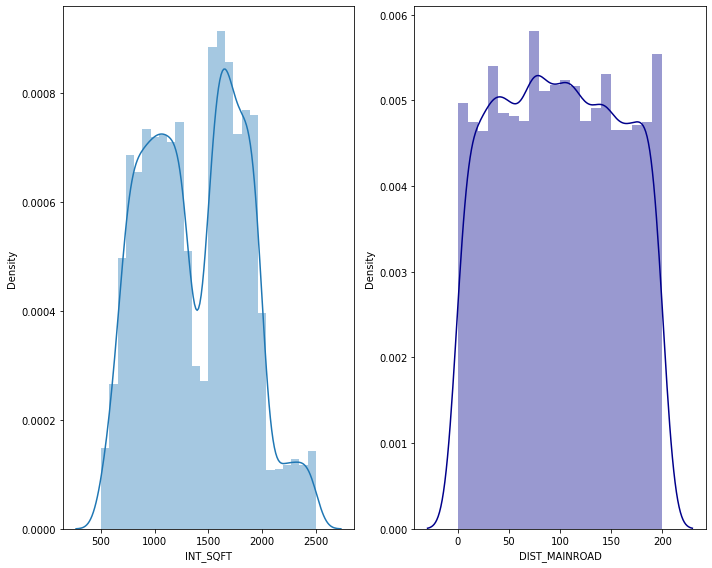

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(dataset.INT_SQFT)
plt.subplot(1,2,2)
sns.distplot(dataset.DIST_MAINROAD,color = 'darkblue')
plt.tight_layout()

Here,
INTSQFT doesn't have more skew.
DIST_MAINROAD have uniform distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


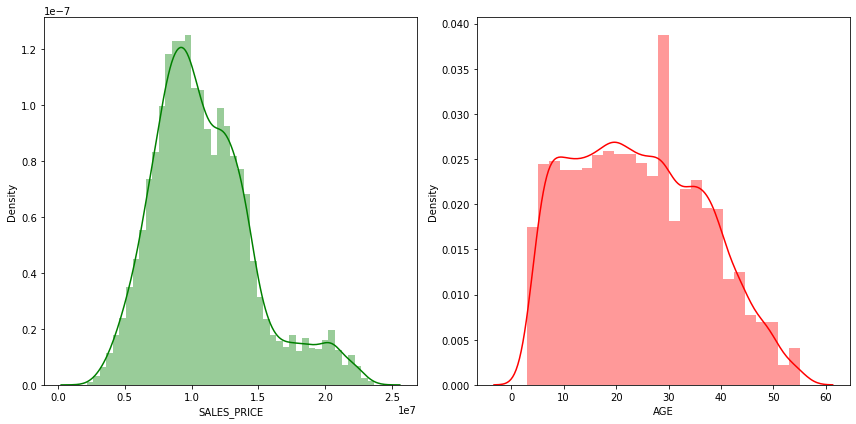

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset.SALES_PRICE,color='green')
plt.subplot(1,2,2)
sns.distplot(dataset.AGE,color='red')
plt.tight_layout()

Here,
We can see small increase in AGE(age of the house) near to uniform distribution.
SALES_PRICE doesn't have more skew.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

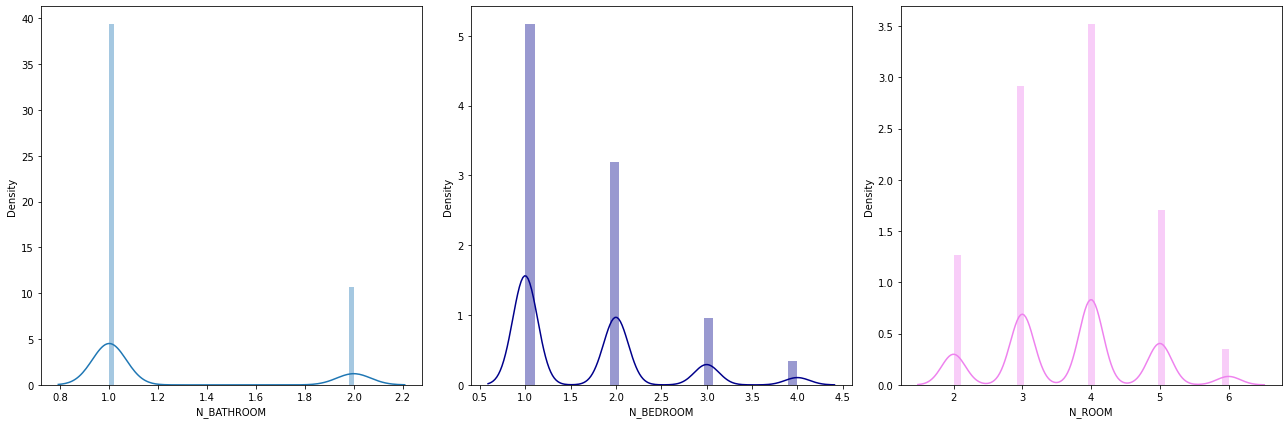

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.distplot(dataset.N_BATHROOM)
plt.subplot(1,3,2)
sns.distplot(dataset.N_BEDROOM,color = 'darkblue')
plt.subplot(1,3,3)
sns.distplot(dataset.N_ROOM,color = 'violet')
plt.tight_layout()
plt.show()

The above distribution, count shows that properties with 1 bathroom, 2 bedrooms , 4 number of rooms are highly available in our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

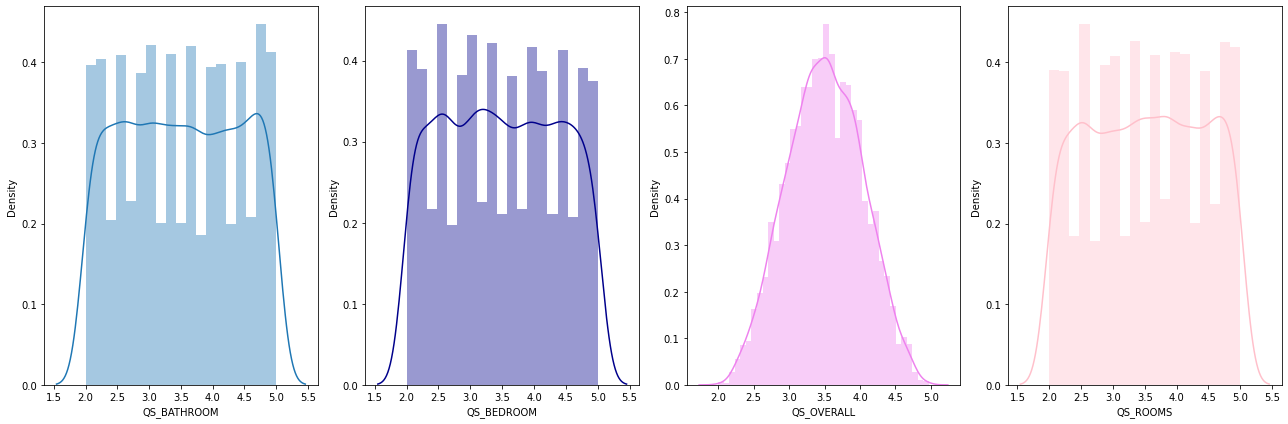

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
sns.distplot(dataset.QS_BATHROOM)
plt.subplot(1,4,2)
sns.distplot(dataset.QS_BEDROOM,color = 'darkblue')
plt.subplot(1,4,3)
sns.distplot(dataset.QS_OVERALL,color = 'violet')
plt.subplot(1,4,4)
sns.distplot(dataset.QS_ROOMS,color = 'pink')
plt.tight_layout()
plt.show()

QS_BATHROOM,QS_BEDROOM and QS_ROOMS near to uniform distribution.QS_OVERALL distribution near to normal distribution.

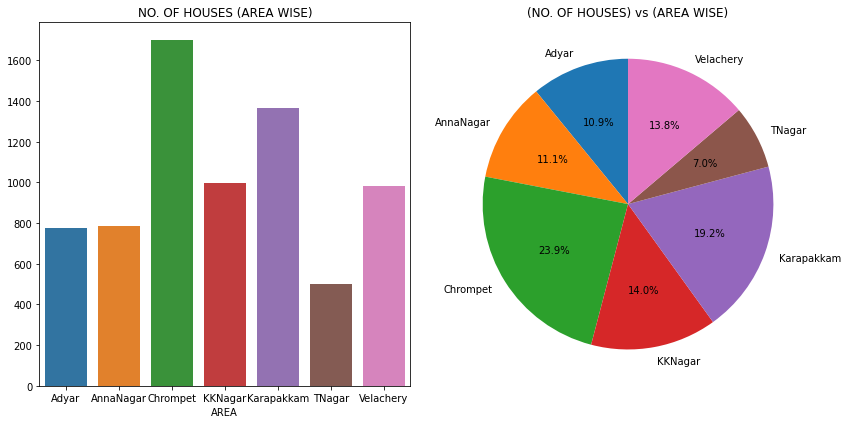

In [ ]:
plt.figure(figsize=(12,6))
A=dataset['AREA'].groupby(dataset['AREA']).count()
a=[]
for i in A:
  r=(i/7061)*100
  a.append(r)
y=['Adyar','AnnaNagar','Chrompet','KKNagar','Karapakkam','TNagar','Velachery']

plt.subplot(1,2,1)
sns.barplot(x=A.index,y=A.values,data=dataset)
plt.title('NO. OF HOUSES (AREA WISE)')

plt.subplot(1,2,2)
plt.pie(a,labels=y,startangle=90,autopct='%1.1f%%')
plt.title('(NO. OF HOUSES) vs (AREA WISE)')

plt.tight_layout()
plt.show()

This distribution shows number of houses areawise.Chrompet have the high no. of houses and TNagar have the low no. of houses.

##*FEATURES VS TARGET*

In [ ]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR', 'AGE'],
      dtype='object')

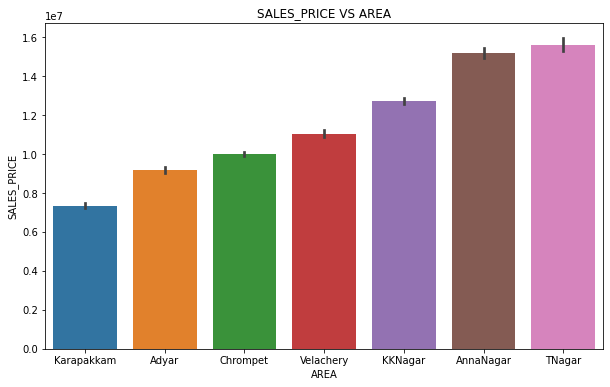

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='AREA',y='SALES_PRICE',data=dataset,order=dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('SALES_PRICE VS AREA')
plt.show()

By observing, AREA is one of the feature which increase the SCALES_PRICE.
One of the important feature in this data.
Which has order.So, We can go with label encoding.
{'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KKNagar':5,'AnnaNagar':6,TNagar':7}

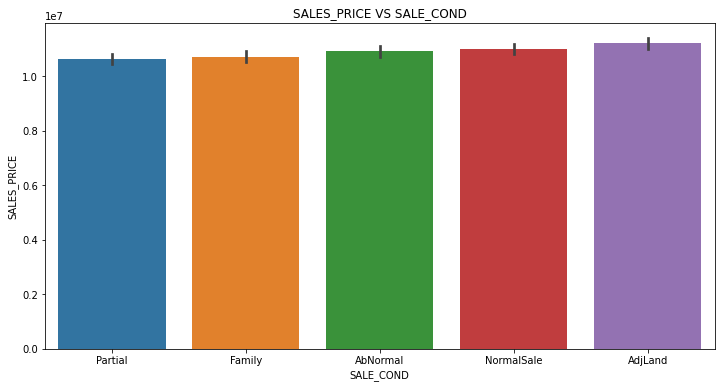

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALES_PRICE VS SALE_COND')

plt.show()

By observing the above plot there is a slight increase depends upon the SALE_COND.There is an order.
We will go with lable encode.
{'Partial':1,'Family':2,'AbNormal':3,'NormalSale':4,'AdjLand':5}

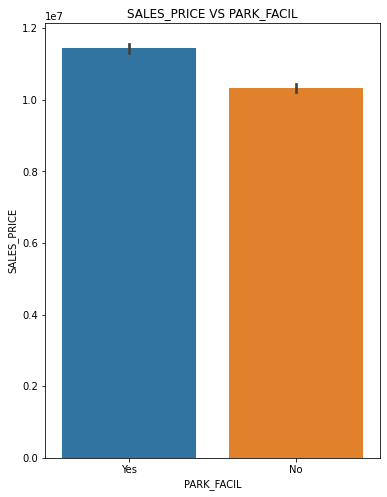

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=dataset)
plt.title('SALES_PRICE VS PARK_FACIL')
plt.show()

Slight decrease in SALES_PRICE if, there is no parking facility.
It's a binary feature.
We can use label encode.

Text(0.5, 1.0, 'SALES_PRICE VS BUILDTYPE WISE')

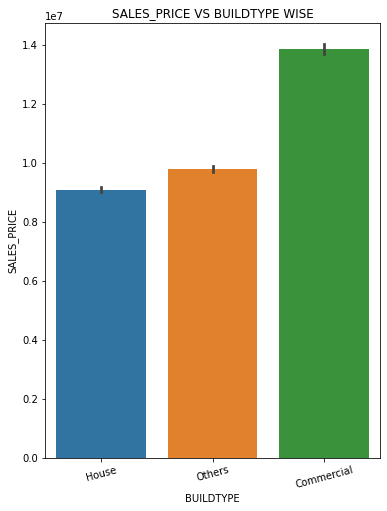

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=dataset,order=dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('SALES_PRICE VS BUILDTYPE WISE')

By observing, Depends on BUILDTYPE, the SALES_PRICE is increasing.
Which have an order house-1,others-2,commerical-3.
We will go with label encode.

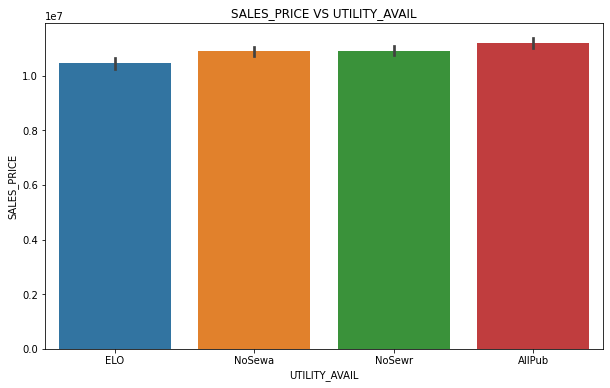

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=dataset,order=dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('SALES_PRICE VS UTILITY_AVAIL')
plt.show()

By observing, Depends on UTILITY_AVAIL, the SALES_PRICE is increasing slightly.
Which have an order ELO-1,NoSewa-2,NoSewr-3,AllPub-4.
We will go with label encode.

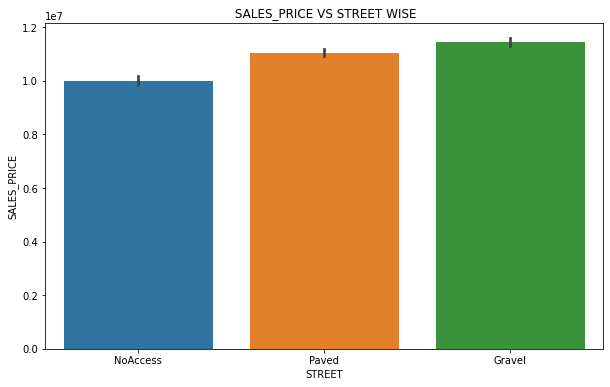

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='STREET',y='SALES_PRICE',data=dataset,order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title(' SALES_PRICE VS STREET WISE')
plt.show()

By observing, Depends on STREET, the SALES_PRICE is increasing slightly.
Which have an order NoAccess-1,Paved-2,Gravel-3.
We will go with label encode.

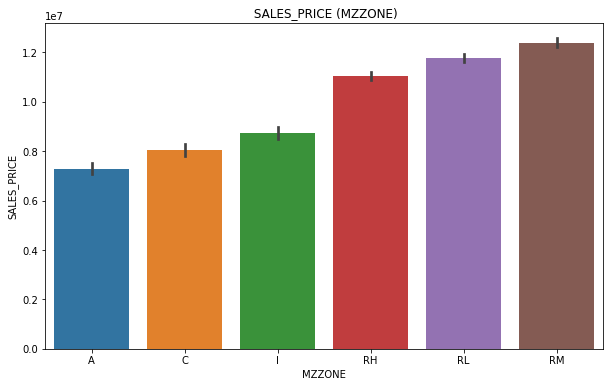

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='MZZONE',y='SALES_PRICE',data=dataset,order=dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title(' SALES_PRICE (MZZONE)')
plt.show()

By observing, Depends on MZZONE, the SALES_PRICE is increasing.
Which have an order A-1, C-2, I-3, RH-4, RL-5,RM-6.
We will go with label encode.

### *OVERALL FEATURE PLOTTING WITH SALE_PRICE:*

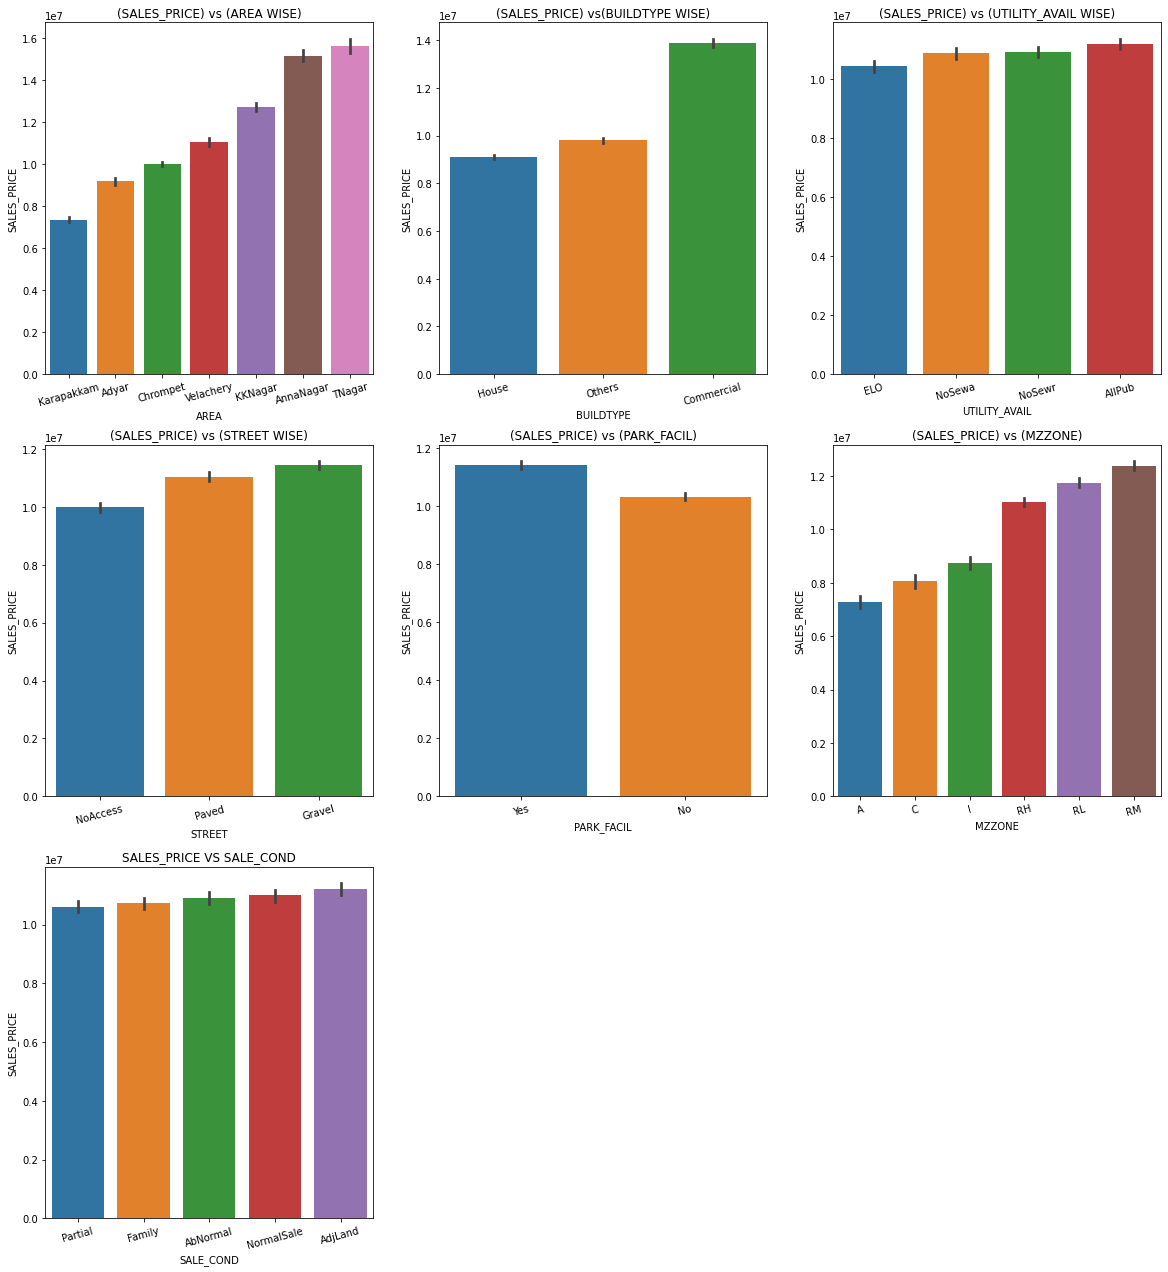

In [ ]:
plt.figure(figsize=(20,22))
plt.subplot(3,3,1)
sns.barplot(x='AREA',y='SALES_PRICE',data=dataset,order=dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (AREA WISE)')
plt.subplot(3,3,2)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=dataset,order=dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs(BUILDTYPE WISE)')
plt.subplot(3,3,3)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=dataset,order=dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (UTILITY_AVAIL WISE)')
plt.subplot(3,3,4)
sns.barplot(x='STREET',y='SALES_PRICE',data=dataset,order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (STREET WISE)')
plt.subplot(3,3,5)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=dataset)
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (PARK_FACIL)')
plt.subplot(3,3,6)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=dataset,order=dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (MZZONE)')
plt.subplot(3,3,7)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.xticks(rotation=15)
plt.title('SALES_PRICE VS SALE_COND')
plt.show()

## *FEATURE ANALYSIS*

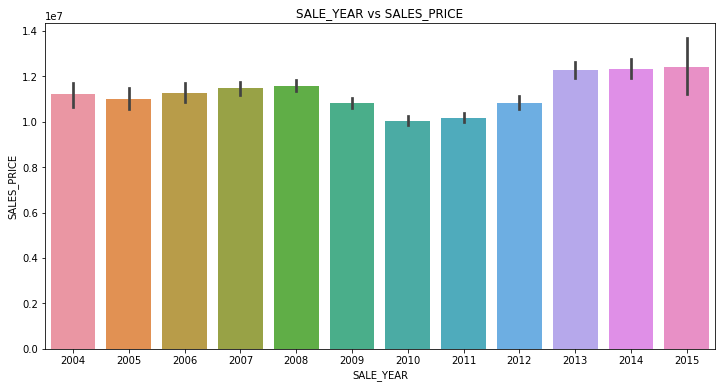

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALE_YEAR',y='SALES_PRICE',data=dataset)
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

This plot shows us slight increase decrease b/w 2004 to 2008.
Then, drop occur in 2009 and slightly increase in 2012.
Then, 2013 to 2015 it maintain high sales price in 2013 to 2015.
2015 is the year which have highest sales price.
This shows year by year there is a increase in sales_price

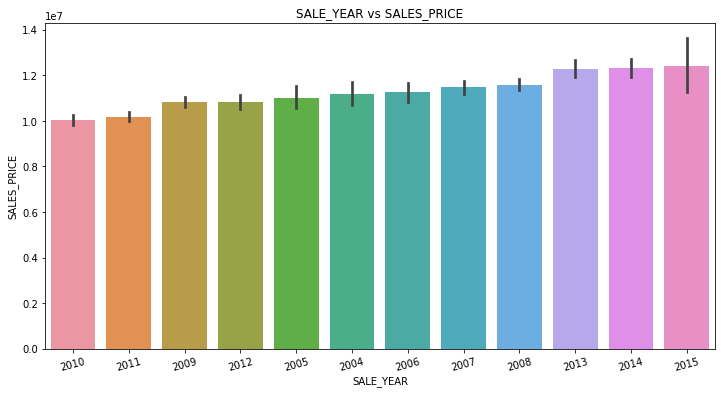

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALE_YEAR',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALE_YEAR')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_YEAR'])
plt.xticks(rotation=15)
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

This plot shows the ordered sales price in sale yearwise.

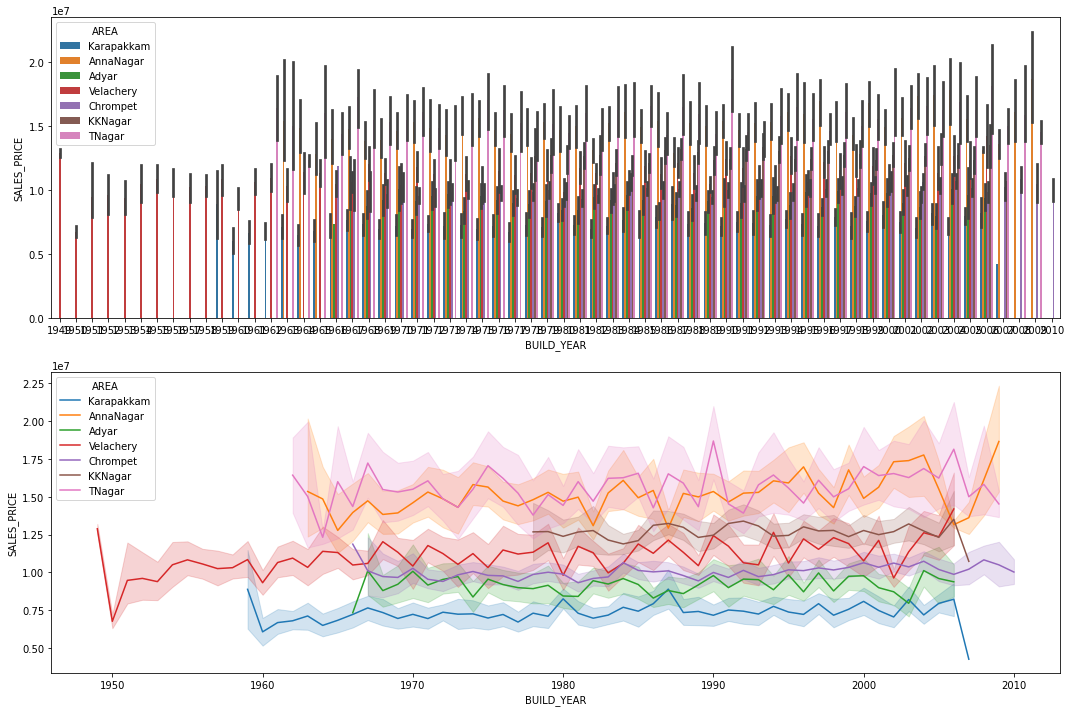

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(x = "BUILD_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.subplot(2,1,2)
sns.lineplot(x = "BUILD_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')
plt.tight_layout()
plt.show()

## *OBSERVATION:*

KARAPPAKKAM:
Minimum sales price in karappakkam.The build year is b/w 1959 to 2008.There is some rise up and down in sales price.

ANNANAGAR:
Annanagar is one of the best sales price. The build year is b/w 1963 to 2010.
There is some rise up and down in sales price.It ends with high range.

ADYAR:
Adyar is the second lowest sales price. The build year is b/w 1965 to 2008.
There is some rise up and down in sales price.

VELACHERY:
Velachery is starts with nice range and end with also good range.e build year is b/w 1950 to 2008.There is some rise up and down in sales price.It ends with high range.

CHROMPET:
Chrompet is also like adyar. The build year is b/w 1965 to 2010.It start with rise but end with fall in sales price.

KKNAGAR:
KKNagar is also one of the good profitable area.The build is b/w 1979 to 2009.
There is some rise up and down in sales price.

TNAGAR:
TNagar is one of the best area in chennai for realestate.
the build year is b/w 1960 to 2010.It gives profitable price.




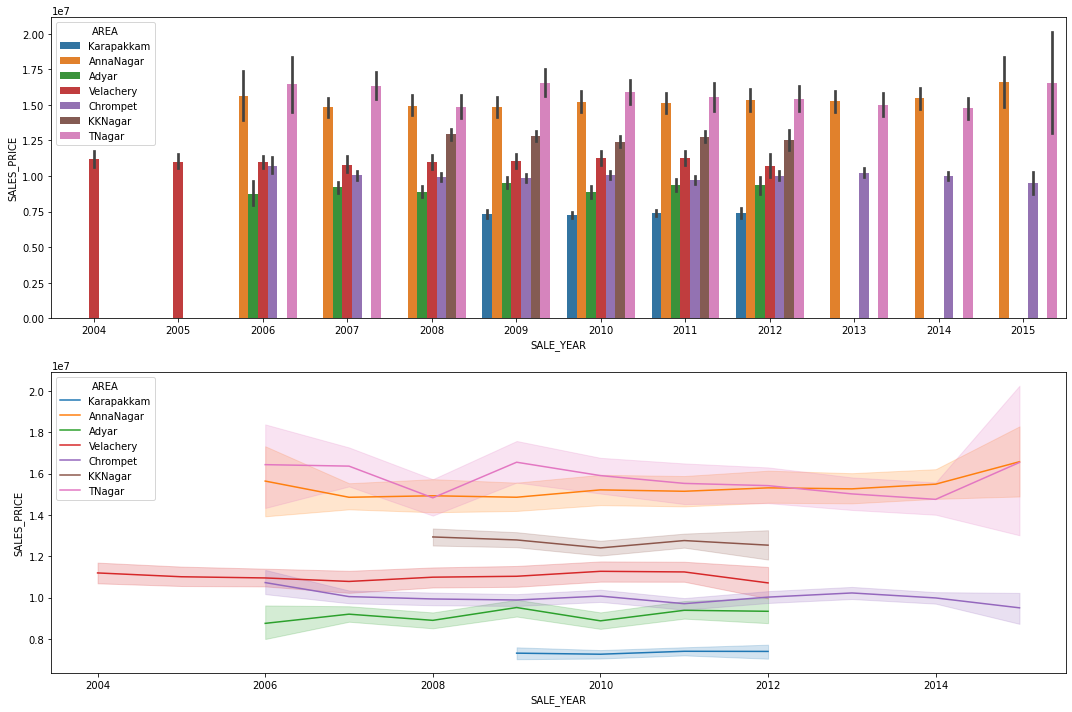

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(x = "SALE_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.subplot(2,1,2)
sns.lineplot(x = "SALE_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.tight_layout()
plt.show()

## *OBSERVATION:*

KARAPPAKKAM:
Minimum profitable area is karappakkam, it doesn't maintain the consistency in sale year.

ANNANAGAR:
AnnaNagar looks profitable area.Huge sales price consistency .
It is one of the best profitable area in chennai using the above plot.

ADYAR:
Adyar maintain the consistency in both saleprice and salesyear but it is only  b/w 2006 to 2012.

VELACHERY:
In, 2004 and 2005 velachery is the only sold area.
Velachery also maintain the consistency in both saleprice and salesyear but this one is only b/w 2004 to 2012 as similar as adyar.

CHROMPET:
Chrompet shows average growth in salesprice.
It maintain the consistency.

KKNAGAR:
KKNagar good in saleprice but sales year only occurred b/w 2008 to 2012.

TNAGAR:
First huge sales price consistency occur in TNagar.TNagar is one of the best profitable area in chennai using the above plot.

Maintaing high consistency in both salesprice and saleyear are **TNagar, AnnaNagar and Chrompet**.This areas are may give a huge profit for us in future days.



## *RELATIONSHIP B/W FEATURES AND TARGET:*

In [ ]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,AGE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03,7061.000000,7061.000000,7061.000000
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07,1985.489874,2009.766605,24.276731
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06,12.648207,2.206717,12.331248
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,1949.000000,2004.000000,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06,1976.000000,2008.000000,14.000000
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07,1986.000000,2010.000000,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07,1996.000000,2011.000000,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,2010.000000,2015.000000,55.000000


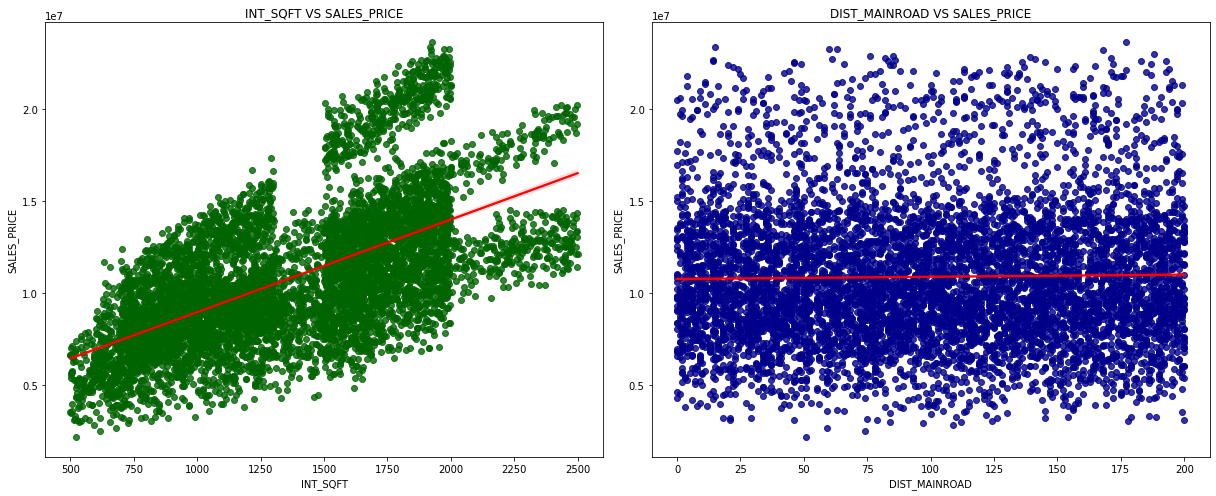


              INT_SQFT  SALES_PRICE
INT_SQFT     1.000000     0.612747
SALES_PRICE  0.612747     1.000000

                DIST_MAINROAD  SALES_PRICE
DIST_MAINROAD       1.000000     0.018269
SALES_PRICE         0.018269     1.000000


In [ ]:
plt.figure(figsize=(17,7))

plt.subplot(121)
sns.regplot(x=dataset['INT_SQFT'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkgreen'},line_kws={'color':'red'})
plt.title('INT_SQFT VS SALES_PRICE')

plt.subplot(122)
sns.regplot(x=dataset['DIST_MAINROAD'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('DIST_MAINROAD VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['INT_SQFT','SALES_PRICE']].corr())
print('\n',dataset[['DIST_MAINROAD','SALES_PRICE']].corr())

BY OBSERVING ABOVE PLOTS AND CORR:
We came to know, 
INT_SQFT have good relation and have good linear relation with SALES_PRICE.
DIST_MAINROAD doesn't have relation and linear relation with SALES_PRICE.
So, we gonna drop the DIST_MAINROAD.

In [ ]:
dataset=dataset.drop(['DIST_MAINROAD'],axis=1)

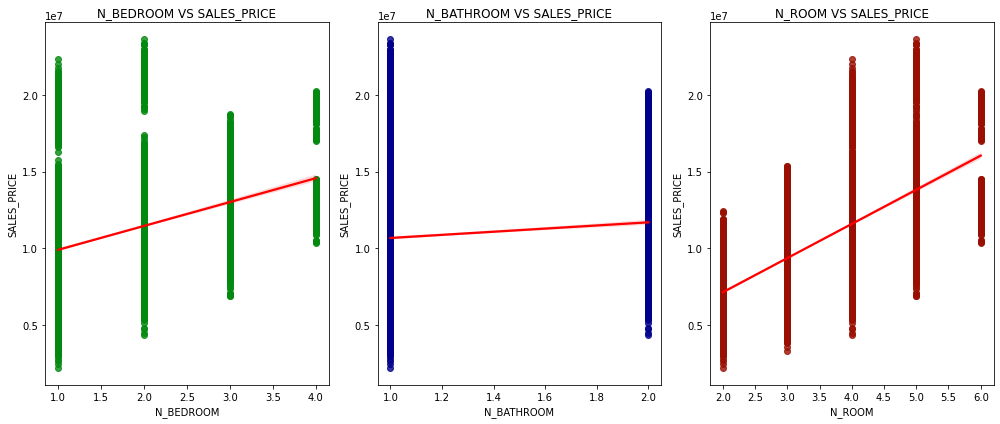


              N_BEDROOM  SALES_PRICE
N_BEDROOM     1.000000     0.332609
SALES_PRICE   0.332609     1.000000

              N_BATHROOM  SALES_PRICE
N_BATHROOM     1.000000     0.110896
SALES_PRICE    0.110896     1.000000

               N_ROOM  SALES_PRICE
N_ROOM       1.00000      0.60352
SALES_PRICE  0.60352      1.00000


In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(131)
sns.regplot(x=dataset['N_BEDROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#02890F'},line_kws={'color':'red'})
plt.title('N_BEDROOM VS SALES_PRICE')

plt.subplot(132)
sns.regplot(x=dataset['N_BATHROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('N_BATHROOM VS SALES_PRICE')

plt.subplot(133)
sns.regplot(x=dataset['N_ROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#990F02'},line_kws={'color':'red'})
plt.title('N_ROOM VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['N_BEDROOM','SALES_PRICE']].corr())
print('\n',dataset[['N_BATHROOM','SALES_PRICE']].corr())
print('\n',dataset[['N_ROOM','SALES_PRICE']].corr())

BY OBSERVING ABOVE PLOTS AND CORR:
We came to know,
N_BEDROOM AND N_ROOM have relationship and linear relationship too with SALES_PRICE.
N_BATHROOM have very slight small relationship but there is no linear relationship with SALES_PRICE.Let's try some transform.

In [ ]:
dataset['TRANS_N_BATHROOM']  = np.log(dataset['N_BATHROOM'])
print(dataset[['TRANS_N_BATHROOM','SALES_PRICE']].corr())
dataset=dataset.drop(['TRANS_N_BATHROOM'],axis=1)

                  TRANS_N_BATHROOM  SALES_PRICE
TRANS_N_BATHROOM          1.000000     0.110896
SALES_PRICE               0.110896     1.000000


Every transform is failed over here.There is no linear relation in N_BATHROOM.Let's consider as linear.

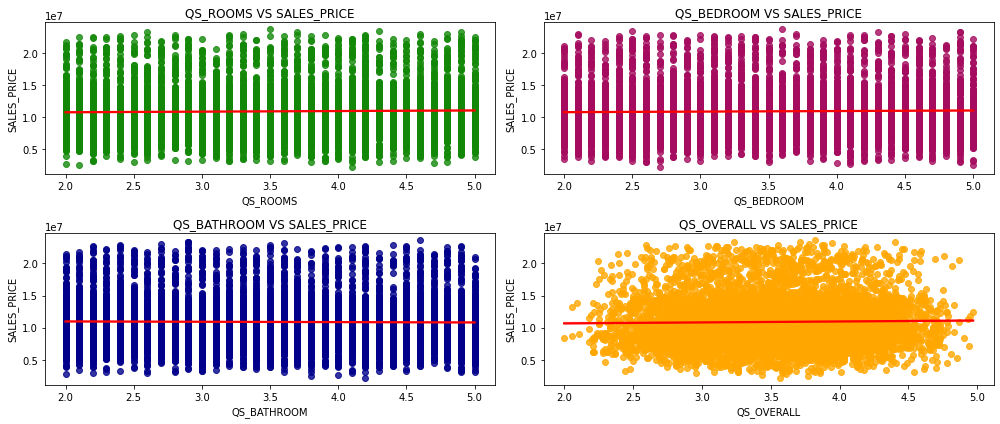


              QS_ROOMS  SALES_PRICE
QS_ROOMS     1.000000     0.022275
SALES_PRICE  0.022275     1.000000

              QS_BEDROOM  SALES_PRICE
QS_BEDROOM     1.000000     0.020413
SALES_PRICE    0.020413     1.000000

              QS_BATHROOM  SALES_PRICE
QS_BATHROOM     1.000000    -0.012363
SALES_PRICE    -0.012363     1.000000

              QS_OVERALL  SALES_PRICE
QS_OVERALL     1.000000     0.020556
SALES_PRICE    0.020556     1.000000


In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(221)
sns.regplot(x=dataset['QS_ROOMS'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#138808'},line_kws={'color':'red'})
plt.title('QS_ROOMS VS SALES_PRICE')

plt.subplot(222)
sns.regplot(x=dataset['QS_BEDROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#A50B5E'},line_kws={'color':'red'})
plt.title('QS_BEDROOM VS SALES_PRICE')

plt.subplot(223)
sns.regplot(x=dataset['QS_BATHROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('QS_BATHROOM VS SALES_PRICE')

plt.subplot(224)
sns.regplot(x=dataset['QS_OVERALL'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#FFA700'},line_kws={'color':'red'})
plt.title('QS_OVERALL VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['QS_ROOMS','SALES_PRICE']].corr())
print('\n',dataset[['QS_BEDROOM','SALES_PRICE']].corr())
print('\n',dataset[['QS_BATHROOM','SALES_PRICE']].corr())
print('\n',dataset[['QS_OVERALL','SALES_PRICE']].corr())

BY OBSERVING ABOVE PLOTS AND CORR:
We came to know,
There is no relationship and there is no linear relation at all in all with SALES_PRICE.
QS_ROOMS, QS_BEDROOM, QS_BATHROOM and QS_OVERALL.
So, we gonna drop all 4 columns.

In [ ]:
dataset=dataset.drop(['QS_ROOMS', 'QS_BEDROOM', 'QS_BATHROOM','QS_OVERALL'],axis=1)

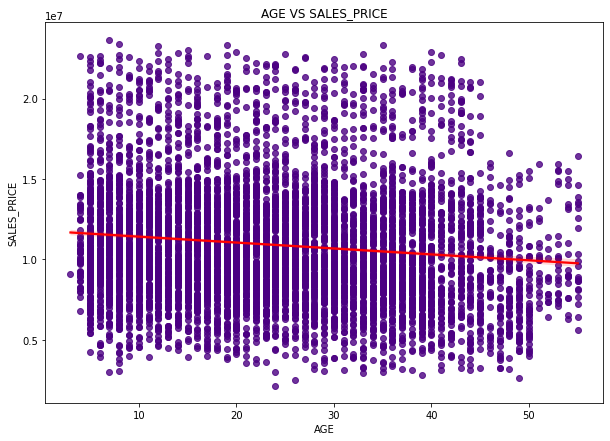

                  AGE  SALES_PRICE
AGE          1.000000    -0.120544
SALES_PRICE -0.120544     1.000000


In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(x=dataset['AGE'],y=dataset['SALES_PRICE'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})
plt.title('AGE VS SALES_PRICE')
plt.show()

print(dataset[['AGE','SALES_PRICE']].corr())

BY OBSERVING THE ABOVE PLOT AND CORR:
We came to know,
There is a slight relationship and slight near to linear relationship in AGE with SALES_PRICE.

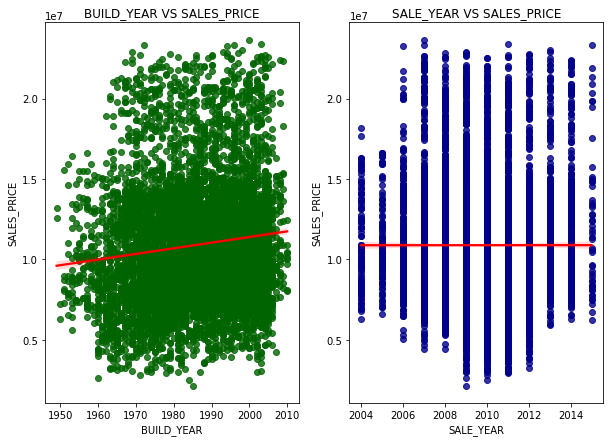


              BUILD_YEAR  SALES_PRICE
BUILD_YEAR     1.000000     0.117587
SALES_PRICE    0.117587     1.000000

              SALE_YEAR  SALES_PRICE
SALE_YEAR     1.000000     0.000368
SALES_PRICE   0.000368     1.000000


In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(121)
sns.regplot(x=dataset['BUILD_YEAR'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkgreen'},line_kws={'color':'red'})
plt.title('BUILD_YEAR VS SALES_PRICE')

plt.subplot(122)
sns.regplot(x=dataset['SALE_YEAR'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('SALE_YEAR VS SALES_PRICE')
plt.show()

print('\n',dataset[['BUILD_YEAR','SALES_PRICE']].corr())
print('\n',dataset[['SALE_YEAR','SALES_PRICE']].corr())


BY OVSERVING THE ABOVE PLOT AND CORR:
We came to know,
BUILD_YEAR have relation and near to linear relation with SALES_PRICE.
SALE_YEAR have no relation and no linear relation with SALES_PRICE.Let's drop the column.

In [ ]:
dataset=dataset.drop(['SALE_YEAR'],axis=1)

Here, We finished the EDA part.Let's move with Encoding part.


## *ANALYSING THE SALES PRICE:*

**BUILDTYPE SALES PRICEWISE MIN,AVG,MAX**

In [51]:
buildtype_fltr_C = dataset['BUILDTYPE']=='Commercial'
commercial=dataset.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Mean_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

buildtype_fltr_H = dataset['BUILDTYPE']=='House'
House=dataset.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

buildtype_fltr_O = dataset['BUILDTYPE']=='Others'
Others=dataset.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Buildtype_mmm = pd.concat([comm,house,others],axis=1)
Buildtype_mmm = pd.DataFrame(Buildtype_mmm.T)
Buildtype_mmm["Build_type"]=["Commercial","House","Others"]

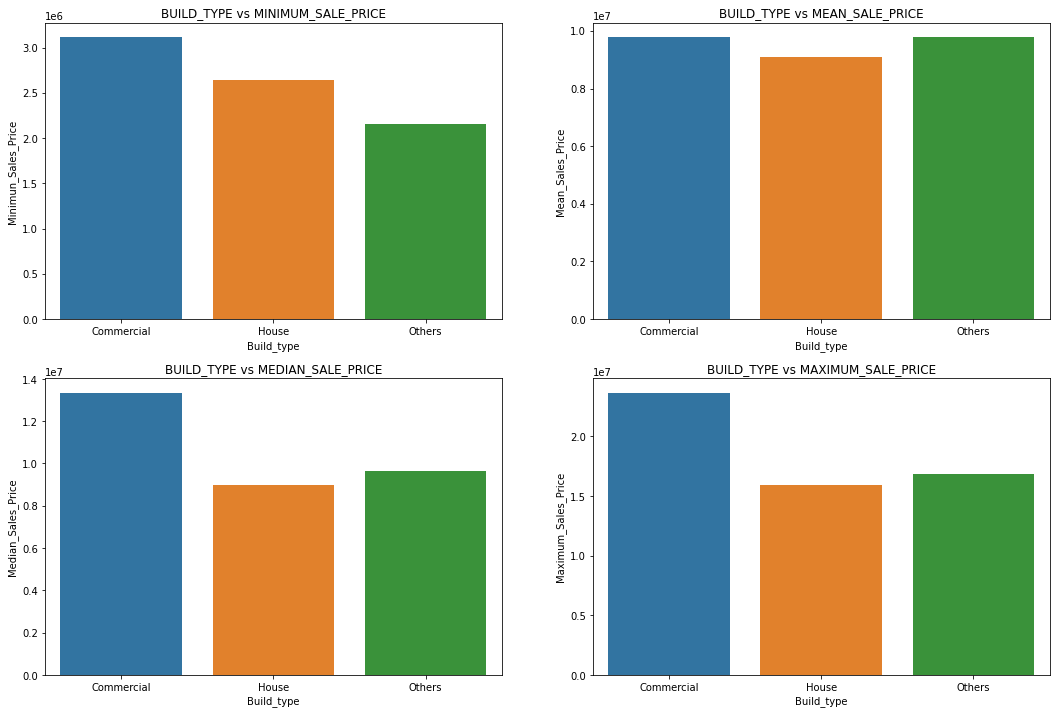

In [57]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Mean_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MEAN_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

COMMERCIAL:
Commercial takes first place in every plot ( mean,median,min and max )sales price.
Commercial dominates everywhere.
Minimum sales price took large amount of commercial.Then max,mean and median.

HOUSE:
House takes last place in max,mean and mode of sales price.
In minimum sales price it was in second place.
High amount of House occur in Minimum sales price

OTHERS:
Others maintain the average in every plot (mean,median,min and max) sales price.
In mean sales price it was similar to commercial one.
High amount of others occur in Minimum sales price


Commercial type is the best one for sellers.

**AREA SALES PRICEWISE MIN,AVG,MAX**

In [56]:
mean=dataset.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=dataset.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=dataset.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=dataset.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

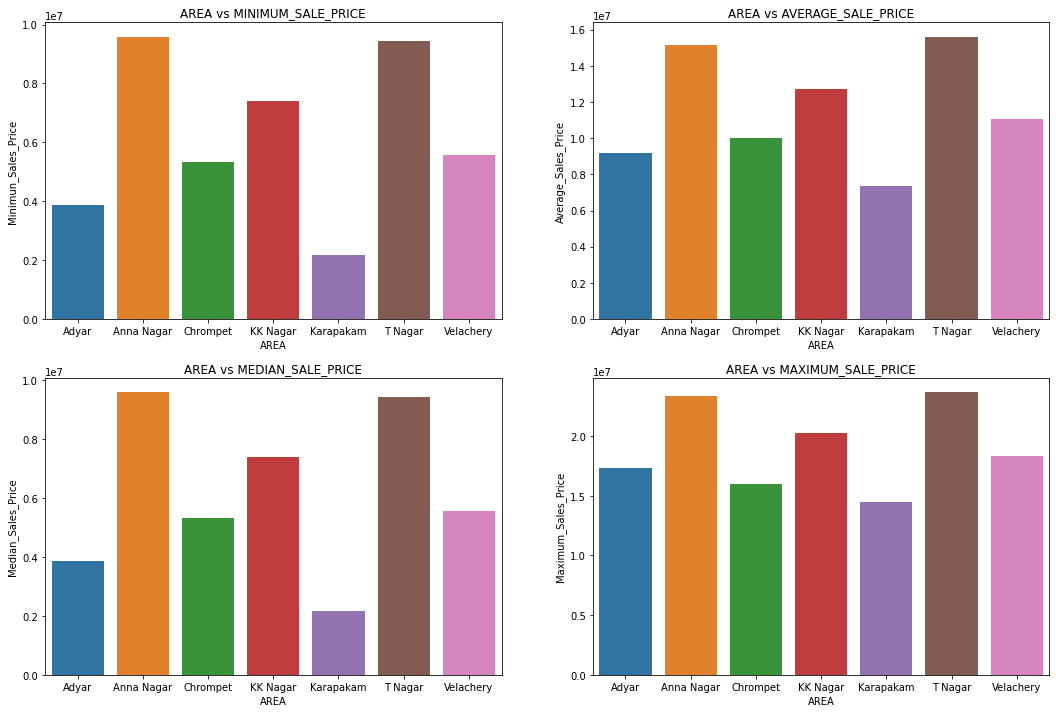

In [61]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

MINIMUN SALES PRICE:
The order of minimum sales price from low to high is as follows,
  Karapakam,Adyar,Chrompet,Velachery,KK Nagar,TNagar and AnnaNagar.
Annanagar is the highest one in minimum sales price.

AVEREAGE SALES PRICE:
The order of average sales price from low to high is as follows,
  Karapakam,Adyar,Chrompet,Velachery,KK Nagar,Annanagar and TNagar.
TNagar is the highest one in Average sales price.

MEDIAN SALES PRICE:
The order of median sales price from low to high is as follows,
  Karapakam,Adyar,Chrompet,Velachery,KK Nagar,TNagar and AnnaNagar.
Annanagar is the highest one in median sales price.

MAXIMUM SALES PRICE:
The order of maximum sales price from low to high is as follows,
  Karapakam,Chrompet,Adyar,Velachery,KKNagar,Annanagar and TNagar.
TNagar is the highest one in maximum sales price.

TNagar and Annanagar is the best place for the sellers.
Moreover KKNagar maintain the consistency.

In [62]:
mean=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

**SALES PRICE OF EACH BUILDTYPE WITH AREA**

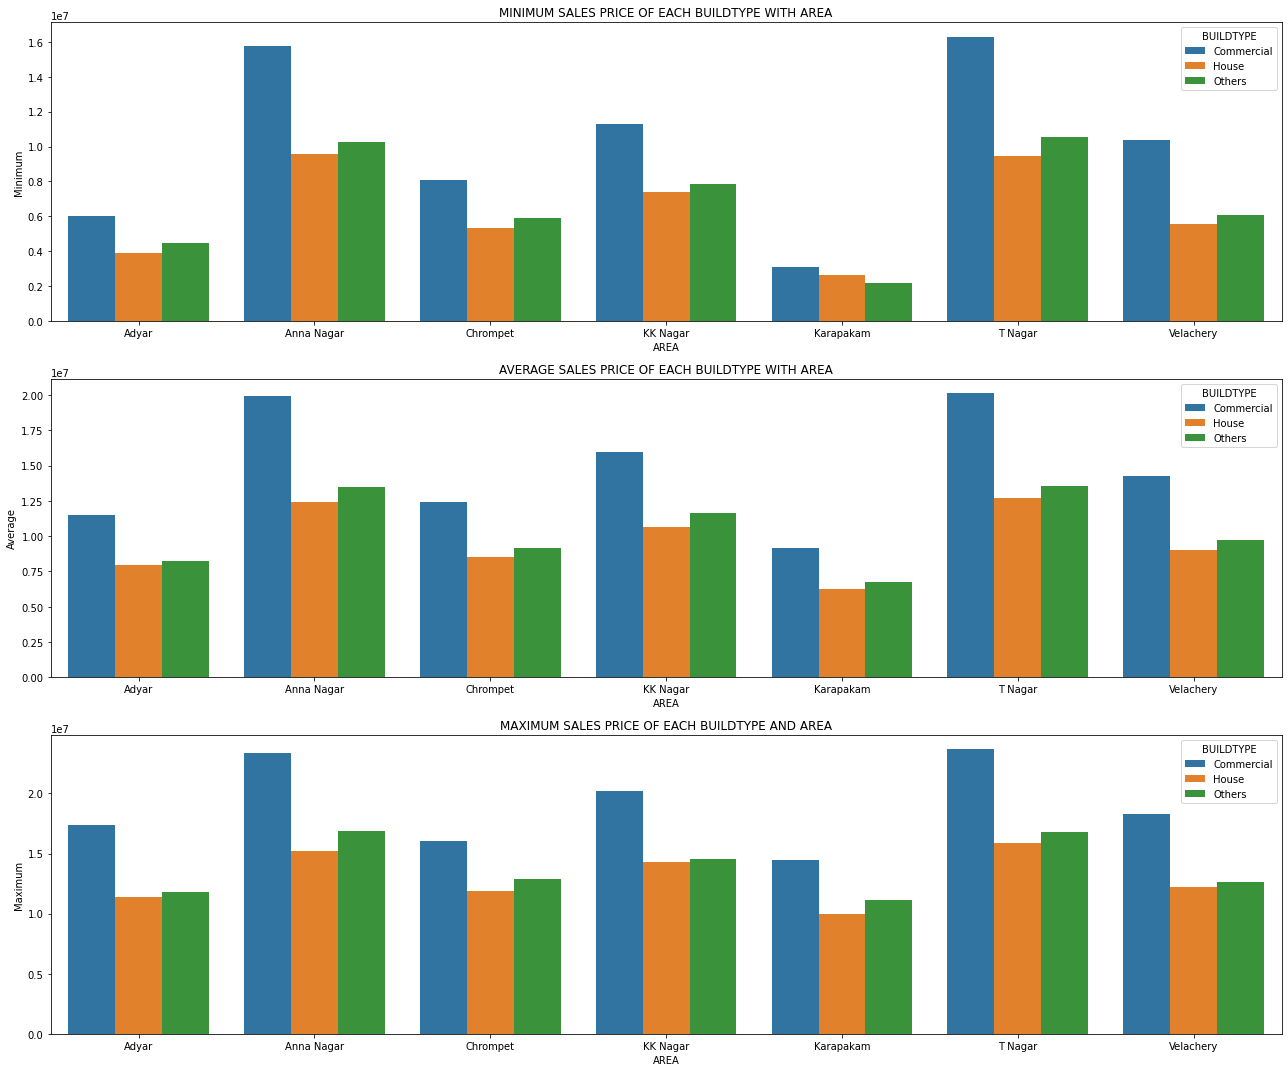

In [71]:
plt.figure(figsize=(18,15))

plt.subplot(311)
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE WITH AREA')

plt.subplot(312)
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE WITH AREA')

plt.subplot(313)
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')

plt.tight_layout()
plt.show()

HIGH: TNagar and Annanagar have the hight level of sales price.
Beacause,commercial type build occurs more than others that's why that area dominates in sales price everywhere.

AVERAGE: KKNagar,Velachery and Chrompet have the average level of sales price. 

LOW: Karapakkam and Adyar have low sales price.

## **ENCODE**

COLUMNS FOR ENCODE:
    ['AREA', 'INT_SQFT','SALE_COND','PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']

In [ ]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILD_YEAR', 'AGE'],
      dtype='object')

In [ ]:
dataset.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILD_YEAR,AGE
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,1967,44
1,AnnaNagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,1995,11
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,1992,20
3,Velachery,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,1988,22
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,1979,30


In [72]:
dataset['AREA']=dataset['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KKNagar':5,'AnnaNagar':6,'TNagar':7})
dataset['SALE_COND']=dataset['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'NormalSale':4,'AdjLand':5})
dataset['PARK_FACIL']=dataset['PARK_FACIL'].map({'Yes':1,'No':0})
dataset['BUILDTYPE']=dataset['BUILDTYPE'].map({'House':1,'Others':2,'Commercial':3})
dataset['UTILITY_AVAIL']=dataset['UTILITY_AVAIL'].map({'ELO':1,'NoSewa':2,'NoSewr':3,'AllPub':4})
dataset['STREET']=dataset['STREET'].map({'NoAccess':1,'Paved':2,'Gravel':3})
dataset['MZZONE']=dataset['MZZONE'].map({ 'A':1, 'C':2, 'I':3, 'RH':4, 'RL':5,'RM':6})
dataset.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,AGE
0,1,1004,131,1,1,3,3,1,3,4,2,1,4.0,3.9,4.9,4.330,7600000,1967,2011,44
1,6,1986,26,2,1,5,3,0,3,4,3,4,4.9,4.2,2.5,3.765,21717770,1995,2006,11
2,2,909,70,1,1,3,3,1,3,1,3,5,4.1,3.8,2.2,3.090,13159200,1992,2012,20
3,4,1855,14,3,2,5,2,0,2,3,2,3,4.7,3.9,3.6,4.010,9630290,1988,2010,22
4,1,1226,84,1,1,3,3,1,2,4,3,2,3.0,2.5,4.1,3.290,7406250,1979,2009,30


## **TARGET AND FEATURE SELCTION:**

In [ ]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILD_YEAR', 'AGE'],
      dtype='object')

In [138]:
#FEATURES
X=dataset[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE']].values
#TARGET
Y=dataset['SALES_PRICE'].values

## **SPLITING**

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## **SCALING**

Scaling is mandatory for KNN.
Scaling is not mandatory for linear regression,Decision tree and Random forest. but it was good practice to do.Here, i gonna scale the data using StandardScaler for all the model.

In [140]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

## **LINEAR REGRESSION MODEL**

In [141]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

### *TEST*

In [142]:
y_test=Y_test
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,1.315175e+07
1,16053550,1.680500e+07
2,18670480,1.724624e+07
3,6468090,6.096236e+06
4,10732635,1.035751e+07
...,...,...
1408,10441050,9.363275e+06
1409,8595550,1.025218e+07
1410,10721350,1.074093e+07
1411,12114895,1.100394e+07


## *CO-EFFICIENT*

In [143]:
coeff_df = pd.DataFrame(lr.coef_,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'], columns=['Coefficient'])
y_pred = lr.predict(X_test)
coeff_df

,Coefficient
AREA,1.071259e+06
INT_SQFT,6.411576e+05
N_BEDROOM,-1.255770e+06
N_BATHROOM,1.032030e+05
N_ROOM,1.770573e+06
SALE_COND,2.045372e+05
PARK_FACIL,5.059074e+05
BUILDTYPE,1.906253e+06
UTILITY_AVAIL,8.277045e+04
STREET,3.898557e+05


## *INTERCEPT*

In [144]:
lr.intercept_

10905607.450424928

## *EVALUATION METRIC*

In [121]:
print('R2- SCORE:', metrics.r2_score(y_test,lr.predict(X_test)))

R2- SCORE: 0.8810555424666483


## *EQUATION OF LINEAR REGRESSION:*

Y=mX+c
where,
Y - Target variable
X - Features
m - Coefficient
c - Intercept

*'SALES_PRICE'= ('AREA')1071258.804071025+('INT_SQFT')641157.5565530059+('N_BEDROOM')-1255769.5051231966+('N_BATHROOM')103202.95084784742+(N_ROOM')1770573.0695779352+(SALE_COND')204537.15129330553+(PARK_FACIL')505907.4297993424+('BUILDTYPE')1906253.1406325016+(UTILITY_AVAIL')82770.4525548401+(STREET')389855.65352743265+('MZZONE')887054.0661549694+('BUILD_YEAR)-256023.59834418155+('AGE')-466670.2668845074+ 10905607.450424928 *


## **KNN**

In [148]:
def knn_comparison(data, k): 
  x=X_train
  y=Y_train
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, Y_train)
  print("Train Accuracy : ", knn.score(X_train,Y_train))
  print("Val Accuracy : ", np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))
  plot_decision_regions(X_train, Y_train, knn=knn, legend=2)
  plt.xlabel('X') 
  plt.ylabel('Y') 
  plt.title('Knn with K='+ str(k)) 
  plt.show()  

def knn_no_plot(data, k): 
  x=X_train
  y=Y_train
  knn = KNeighborsRegressor(n_neighbors=k) 
  knn.fit(x, y) 
  print("K : ", k, " Train Accuracy : ", knn.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(knn, x, y, cv=5)))

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,50]:
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train,Y_train) 
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))

K value  :  1  score :  0.8863428993211573
K value  :  2  score :  0.9124740100386151
K value  :  3  score :  0.916594529057422
K value  :  4  score :  0.9181697610615739
K value  :  5  score :  0.9163427130830103
K value  :  6  score :  0.9169143883201085
K value  :  7  score :  0.9151835722974735
K value  :  8  score :  0.9130950273194344
K value  :  9  score :  0.912100476107498
K value  :  10  score :  0.9106227874901378
K value  :  20  score :  0.8959411100175961
K value  :  30  score :  0.8807231364618561
K value  :  50  score :  0.8593031107893616


In [85]:
for i in [1,2,3,4,5,6,7,20,30,40,60]:
    knn_no_plot(dataset,i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.8803607244665754
K :  2  Train Accuracy :  0.9733536437303029  Val Accuracy :  0.905551716430395
K :  3  Train Accuracy :  0.9632458673348157  Val Accuracy :  0.9120542578754176
K :  4  Train Accuracy :  0.955379678831007  Val Accuracy :  0.9139105497332551
K :  5  Train Accuracy :  0.9499239218478589  Val Accuracy :  0.912722969941702
K :  6  Train Accuracy :  0.9446472325866118  Val Accuracy :  0.913193230770984
K :  7  Train Accuracy :  0.9409901964250983  Val Accuracy :  0.9113602025355254
K :  20  Train Accuracy :  0.9123668537986794  Val Accuracy :  0.8910431478699129
K :  30  Train Accuracy :  0.894803357760389  Val Accuracy :  0.8759554377688132
K :  40  Train Accuracy :  0.8814567328739823  Val Accuracy :  0.8628932281571975
K :  60  Train Accuracy :  0.8621922980415644  Val Accuracy :  0.8455716732240017


In [149]:
knn = KNeighborsRegressor(n_neighbors=4) 
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=4)

In [150]:
y_test=Y_test
y_pred = knn.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12209087.50
1,16053550,14959557.50
2,18670480,15667740.00
3,6468090,6991560.00
4,10732635,8776120.00
...,...,...
1408,10441050,10442270.00
1409,8595550,8911472.50
1410,10721350,11773185.00
1411,12114895,10803988.75


## *EVALUATION METRIC*

In [152]:
print('R2 SCORE: ',metrics.r2_score(knn.predict(X_test),y_test))

R2 SCORE:  0.9009534783076102


## **DECISION TREE MODEL**

In [153]:
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [154]:
y_test=Y_test
y_pred = dt.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12530800.0
1,16053550,14301080.0
2,18670480,18604220.0
3,6468090,7167380.0
4,10732635,10285360.0
...,...,...
1408,10441050,9750500.0
1409,8595550,9252340.0
1410,10721350,12184280.0
1411,12114895,12669300.0


## *EVALUATION METRIC*

In [156]:
print('DT r2_score 1:',metrics.r2_score(y_test,dt.predict(X_test)))

DT r2_score 1: 0.9687730098378852


*TO AVOID OVER AND UNDER FIT*

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(X_train, Y_train)
  trainAccuracy = metrics.r2_score(Y_train, dt.predict(X_train)) 
  dt = DecisionTreeRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, Y_train, cv=10, scoring = make_scorer(r2_score)) 
  print(depth, trainAccuracy, np.mean(valAccuracy))

1 0.3627516706347409 0.35908388084832604
2 0.6891536123212307 0.6870766247128246
3 0.8055147730026558 0.8040287778106758
4 0.8877933326518938 0.8834033800540327
5 0.9223655077288968 0.9143451758313896
6 0.9439683220164431 0.9366928211376727
7 0.9598922724952037 0.9506155917427449
8 0.972758374995371 0.9602146210878006
9 0.9826212384842643 0.9661413927147733
10 0.9898751141529277 0.970199229440156
20 1.0 0.9716095126972901
40 1.0 0.9716601799496836
60 1.0 0.9716454993164761


Here, the best depth is 40. But it may be leads us to overfit a model.

### ***MAX_DEPTH:***

The number of splits that each decision tree is allowed to make. If the number of splits is too low, the model underfits the data and if it is too high the model overfits. Generally, we go with a max depth of 3, 5, or 7.

1. max_depth = log2(no. of features)
2. max_depth = sqrt(no. of features)

Here, we chose 13 features, 
* log2(13)=3.70043971814 
* sqrt(13)=3.60555128

Now, we got near to 4 as depth

*DT UPDATE*

In [157]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4)

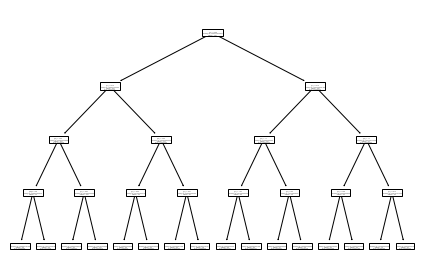

In [158]:
tree.plot_tree(dt)
plt.tight_layout()

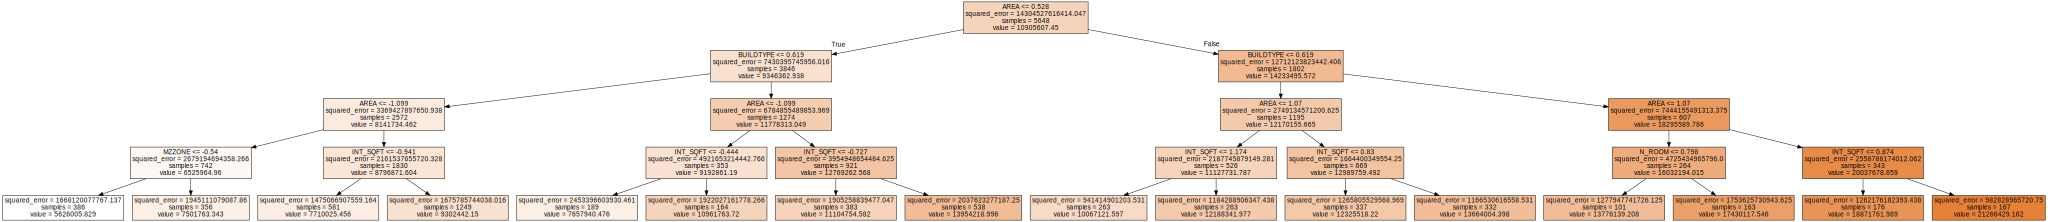

In [159]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'],  
                                class_names=['SALES_PRICE'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [160]:
y_test=Y_test
y_pred = dt.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,1.110475e+07
1,16053550,1.366400e+07
2,18670480,1.743012e+07
3,6468090,9.302442e+06
4,10732635,9.302442e+06
...,...,...
1408,10441050,9.302442e+06
1409,8595550,7.710025e+06
1410,10721350,1.366400e+07
1411,12114895,1.110475e+07


## *EVALUATION METRIC*

In [161]:
print('DT r2_score 2:',metrics.r2_score(y_test,dt.predict(X_test)))

DT r2_score 2: 0.880217130206149


## *FEATURE IMPORTANCE*

[(0.5396670753146863, 'AREA'),
 (0.07198499955859199, 'INT_SQFT'),
 (0.011607986661843544, 'N_BEDROOM'),
 (0.0, 'N_BATHROOM'),
 (0.0, 'N_ROOM'),
 (0.0, 'SALE_COND'),
 (0.0, 'PARK_FACIL'),
 (0.3676553198609699, 'BUILDTYPE'),
 (0.0, 'UTILITY_AVAIL'),
 (0.0, 'STREET'),
 (0.009084618603908428, 'MZZONE'),
 (0.0, 'BUILD_YEAR'),
 (0.0, 'AGE')]

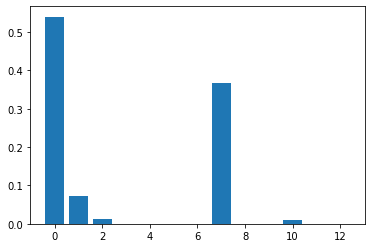

In [99]:
importance = dt.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE']))

By comparing two evaluation metric,

DT r2_score 1: 0.9687730098378852

DT r2_score 2: 0.880217130206149

DT UPDATE is lower than DT.


## **RANDOM FOREST**

In [166]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [167]:
y_test=Y_test
y_pred = rf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12521672.65
1,16053550,14623538.60
2,18670480,18216097.00
3,6468090,7285402.35
4,10732635,10455926.05
...,...,...
1408,10441050,10082598.80
1409,8595550,8543304.35
1410,10721350,11673400.10
1411,12114895,11992995.85


## *EVALUATION METRIC*

In [169]:
print('RF r2_score 1:',metrics.r2_score(y_test,rf.predict(X_test)))

RF r2_score 1: 0.9880116694206362


*RT UPDATE*

### ***MAX_DEPTH:***
Generally you want as many trees as will improve your model. The depth of the tree should be enough to split each node to your desired number of observations. There has been some work that says best depth is 3-8 splits.


1.   *max_depth = log2(no. of features)*
2.   *max_depth = sqrt(no. of features)*

Here, we chose 13 features,
*   log2(13)=3.70043971814
*   sqrt(13)=3.60555128

Now, I will go with 4 as depth

In [170]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4)

In [171]:
y_test=Y_test
y_pred = rf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,1.113725e+07
1,16053550,1.365028e+07
2,18670480,1.748352e+07
3,6468090,9.319846e+06
4,10732635,9.319846e+06
...,...,...
1408,10441050,9.319846e+06
1409,8595550,7.716532e+06
1410,10721350,1.365028e+07
1411,12114895,1.250031e+07


*FEATURE IMPORTANCE*

[(0.5367918910598997, 'AREA'),
 (0.08491151318703373, 'INT_SQFT'),
 (0.0013564055649384137, 'N_BEDROOM'),
 (0.0020483956936366956, 'N_BATHROOM'),
 (0.0013828791321145097, 'N_ROOM'),
 (0.0, 'SALE_COND'),
 (0.0, 'PARK_FACIL'),
 (0.36858487021967434, 'BUILDTYPE'),
 (0.0, 'UTILITY_AVAIL'),
 (0.0, 'STREET'),
 (0.0049240451427025635, 'MZZONE'),
 (0.0, 'BUILD_YEAR'),
 (0.0, 'AGE')]

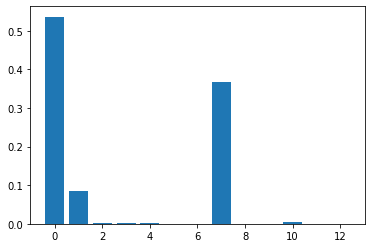

In [105]:
importance = rf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE']))

In [106]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: AREA                 Importance: 0.54
Variable: BUILDTYPE            Importance: 0.37
Variable: INT_SQFT             Importance: 0.08
Variable: N_BEDROOM            Importance: 0.0
Variable: N_BATHROOM           Importance: 0.0
Variable: N_ROOM               Importance: 0.0
Variable: SALE_COND            Importance: 0.0
Variable: PARK_FACIL           Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET               Importance: 0.0
Variable: MZZONE               Importance: 0.0
Variable: BUILD_YEAR           Importance: 0.0
Variable: AGE                  Importance: 0.0


## *EVALUATION METRIC*

In [174]:
print('RF r2_score 2:',metrics.r2_score(y_test,rf.predict(X_test)))

RF r2_score 2: 0.8919186903714785


By comparing two evaluation metric,

RF r2_score 1: 0.9880116694206362

RF r2_score 2: 0.8919186903714785

RF UPDATE is lower than RF.
RF r2_score 1 is higher.


## **XGBOOST**

In [175]:
x_train=X_train
y_train=Y_train
x_test=X_test
y_test=Y_test

In [ ]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,2]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3742335930991094  Cross-Val score :  -0.38479936830083705
Learning rate :  0.02  Train score :  0.7476489452943773  Cross-Val score :  0.7435336826771171
Learning rate :  0.03  Train score :  0.9252836028182734  Cross-Val score :  0.9222973135309142
Learning rate :  0.04  Train score :  0.962415717317962  Cross-Val score :  0.959774005351416
Learning rate :  0.05  Train score :  0.9746944093650557  Cross-Val score :  0.9723474108840824
Learning rate :  0.06  Train score :  0.9805446690798932  Cross-Val score :  0.978746297112824
Learning rate :  0.07  Train score :  0.9848168027978256  Cross-Val score :  0.9830120225686224
Learning rate :  0.08  Train score :  0.9876016662317131  Cross-Val score :  0.9861809710104156
Learning rate :  0.09  Train score :  0.9902500803912924  Cross-Val score :  0.9886164602190822
Learning rate :  0.1  Train score :  0.9922709287178827  Cross-Val score :  0.990539554509148
Learning rate :  0.11  Train score :  0.99

In [179]:
import xgboost as xgb
xgb = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
xgb.fit(x_train,y_train)

[07:16:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.7)

In [180]:
y_test=Y_test
y_pred = xgb.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12541558.0
1,16053550,16243534.0
2,18670480,18586402.0
3,6468090,6633144.5
4,10732635,10594810.0
...,...,...
1408,10441050,10450660.0
1409,8595550,8492894.0
1410,10721350,10980342.0
1411,12114895,12074146.0


## *EVALUATION METRIC*

In [181]:
print(metrics.r2_score(xgb.predict(X_test),y_test))

0.9970123997744169


## **BEST MODEL FOR CHENNAI HOUSE PRICE PREDICTION**

In [183]:
print("XGBoost model Rsquared metric:",metrics.r2_score(y_test,xgb.predict(X_test)))
print("KNN Rsquared metric:",metrics.r2_score(y_test,knn.predict(X_test)))
print("Random forest Regressor model Rsquared metric:",metrics.r2_score(y_test,rf.predict(X_test)))
print("Linear Regg model Rsquared metric:", metrics.r2_score(y_test,lr.predict(X_test)))
print("Decision tree Regressor model Rsquared metric:",metrics.r2_score(y_test,dt.predict(X_test)))

XGBoost model Rsquared metric: 0.99703307493364
KNN Rsquared metric: 0.9185914536768577
Random forest Regressor model Rsquared metric: 0.8919186903714785
Linear Regg model Rsquared metric: 0.8810555424666483
Decision tree Regressor model Rsquared metric: 0.880217130206149


XGBOOST model is the best one out of all 5 models.

### **Now, The time for answering the problem.**

1. IMPORTANT FEATURE FOR THE HOUSE TO FETCH MORE MONEY.
    
       Area,Build Type,Int sqft,Mzzone and amenities are important one for a house.
         'AREA AND BUILDTYPE ARE THE MOST IMPORTANT FEATURES'

  FOR REAL ESTATE PEOPLE,
        TNagar and AnnaNagar is the best place for real estate people.
        Commercial Build type is the best one to build the house.

2. PERMISSIBLE RANGE OF PRICE.
        From mm_df we came to know the sales price range of each area with build type.

        If a person want to buy a house from Karapakam.
        Minimum Price = 26,40,250.00
        Average price = 62,66,439.00
        Maximum price = 99,66,750.00

  THE NEGOTIATE PRICE RANGE IN BETWEEN (90,00,000 - 95,00,000)




In [198]:
mmm_df

Minimum       Average      Median   Maximum  \
BUILDTYPE  AREA                                                       
Commercial Adyar        6036800  1.152774e+07  11233565.0  17360470   
           AnnaNagar   15754040  1.994391e+07  20020970.0  23407860   
           Chrompet     8071050  1.238208e+07  12454750.0  16026600   
           KKNagar     11286720  1.597558e+07  16197860.0  20246360   
           Karapakkam   3120000  9.171470e+06   9345250.0  14486250   
           TNagar      16300260  2.013224e+07  20419750.0  23667340   
           Velachery   10391900  1.426069e+07  14239220.0  18298710   
House      Adyar        3869180  7.972134e+06   7953190.0  11409485   
           AnnaNagar    9593040  1.240167e+07  12352710.0  15237150   
           Chrompet     5340900  8.553965e+06   8548150.0  11845200   
           KKNagar      7410200  1.066954e+07  10652120.0  14276060   
           Karapakkam   2640250  6.270667e+06   6309000.0   9966750   
           TNagar       9433610  1.267075e+07  12691985.0  15880930   
           Velachery    5574400  9.033310e+06   8993590.0  12247960   
Others     Adyar        4456285  8.205278e+06   8179590.0  11818860   
           AnnaNagar   10245090  1.347747e+07  13393255.0  16859010   
           Chrompet     5925790  9.149409e+06   9171700.0  12851040   
           KKNagar      7826780  1.164412e+07  11643600.0  14521700   
           Karapakkam   2156875  6.727557e+06   6677937.5  11117625   
           TNagar      10573780  1.355864e+07  13754600.0  16766120   
           Velachery    6074780  9.730105e+06   9689440.0  12669880   

                        BUILDTYPE        AREA  
BUILDTYPE  AREA                                
Commercial Adyar       Commercial       Adyar  
           AnnaNagar   Commercial  Anna Nagar  
           Chrompet    Commercial    Chrompet  
           KKNagar     Commercial    KK Nagar  
           Karapakkam  Commercial   Karapakam  
           TNagar      Commercial     T Nagar  
           Velachery   Commercial   Velachery  
House      Adyar            House       Adyar  
           AnnaNagar        House  Anna Nagar  
           Chrompet         House    Chrompet  
           KKNagar          House    KK Nagar  
           Karapakkam       House   Karapakam  
           TNagar           House     T Nagar  
           Velachery        House   Velachery  
Others     Adyar           Others       Adyar  
           AnnaNagar       Others  Anna Nagar  
           Chrompet        Others    Chrompet  
           KKNagar         Others    KK Nagar  
           Karapakkam      Others   Karapakam  
           TNagar          Others     T Nagar  
           Velachery       Others   Velachery

                        ------------------------THE END-----------------------